# Evaluación de desempeño de Modelos

## Dependencias

In [2]:
!pip install -U scikit-learn

import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Librerias de analisis y visualizacion de datos

In [3]:
!pip install mlxtend

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mlxtend

In [4]:
from ast import increment_lineno
import warnings

warnings.filterwarnings(action="ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### funciones de utilidad y visualizacion

In [5]:
from mlxtend.plotting import plot_decision_regions

def plot_decision_region(X,y, clf, classes, title=""):
    fig, ax = plt.subplots(dpi=120)
    plot_decision_regions(X, y, clf=clf, ax=ax)
    handles, _ = ax.get_legend_handles_labels()
    ax.set_title(title)
    ax.legend(handles, classes)
    fig.show()

In [6]:
def list_confusion_matrix(cm,classes):
    df = pd.DataFrame(pd.DataFrame(data=cm, index=pd.MultiIndex.from_product([["valor real"], classes])), columns=pd.MultiIndex.from_product([["predicción"], classes]))
    return df

## Conjunto de datos iris

In [7]:
#cargar conjunto de datos iris

from sklearn import datasets

iris = datasets.load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
#ENCONTRAR EL NUMERO DE MUESTRAS Y CARACTERISTICAS

n_samples, n_features = iris.data.shape

print("numero de muestras:", n_samples)
print("numero de caracteristicas:", n_features)

numero de muestras: 150
numero de caracteristicas: 4


In [12]:
for var, value in zip(iris.feature_names, iris.data[-1]):
  print(f"variable {var}:{value}")

variable sepal length (cm):5.9
variable sepal width (cm):3.0
variable petal length (cm):5.1
variable petal width (cm):1.8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9eea2a12-40af-4529-aae7-d588f5d40e36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [13]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


##Distribucion de las especies

<Axes: xlabel='count', ylabel='species'>

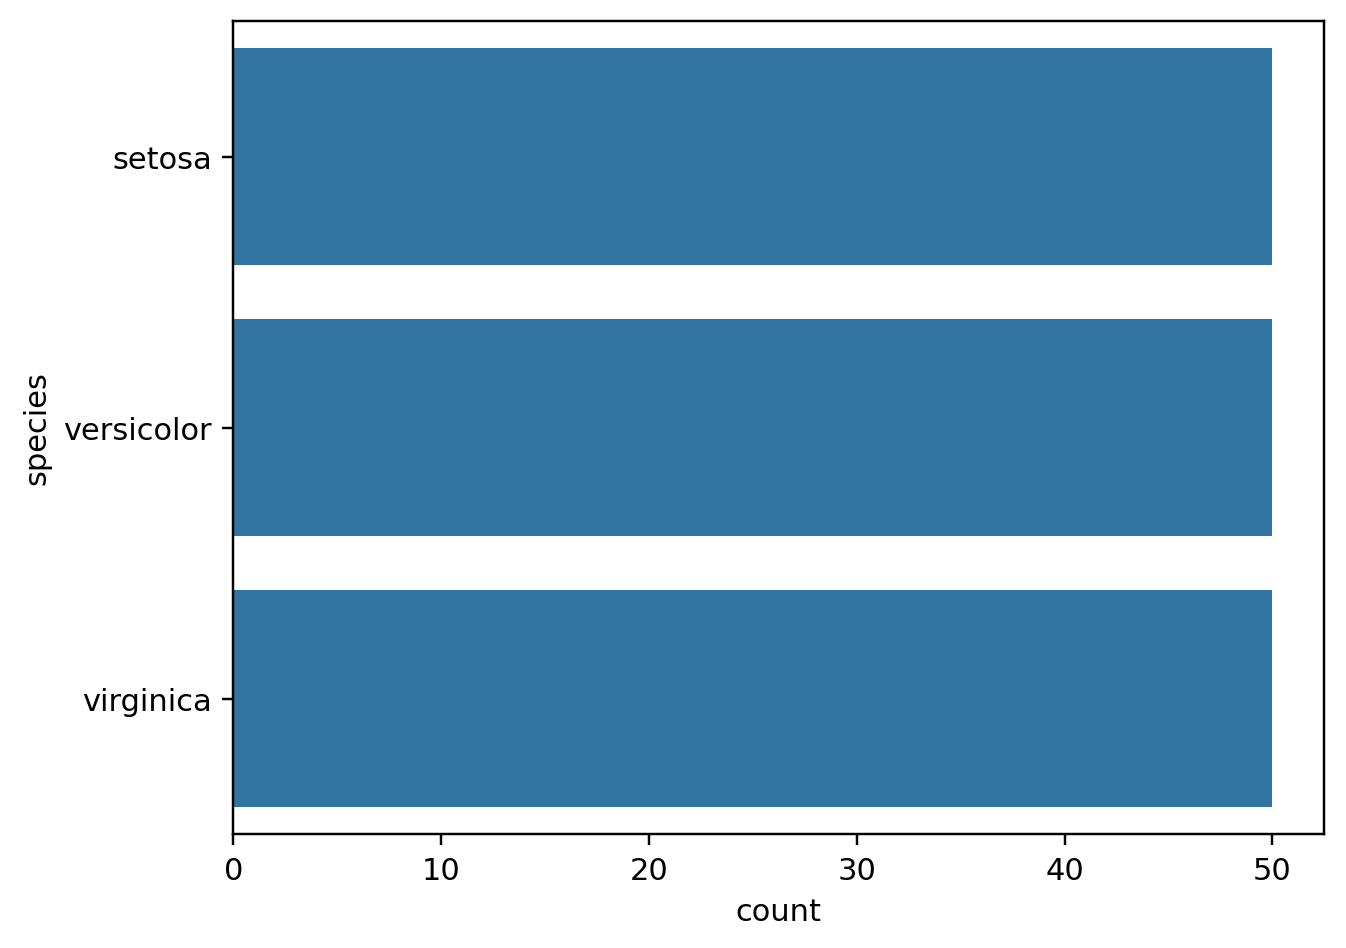

In [14]:
iris_df = sns.load_dataset("iris")

plt.figure(dpi = 110)

sns.countplot(iris_df["species"])